# Why Visualisation

Steps for building a data science product:

1. <b>Preparation Phase</b>: Gather requirements to define problem statement and collect data.


2. <b>Model building Phase</b>: Build the models.


3. <b>Model Deployment Phase</b>: Serve models to clients or relevant stakeholders.


You will be spending most of the time in step 2., i.e. building the model. This step can be broadly divided into:

a. <b>Data analysis</b>: Analyse the data to understand the trends, data distributions and outliers (for cleaning the data). Which model to chose depends on your problem statement and the distribution of data itself. 

b. <b> Data preparation</b>: Based on above, prepare the data for model building.

c. <b>Model building</b>: Build the model(s) identified based on your problem statement and data analysis.

d. <b>Result analysis and re-iterate</b>: Anaylse results of model from c., identify areas of improvement and re-iterate the cycle.

If done right, data analysis can reduce your re-iterations and thus the model building time drastically!!


<b>Visualisation is a tool majorly to speed up the data analysis step. Also, it can be used to convey the results to stakeholdes in an efficient manner.</b>

# What is Visualisation

1. Visualisation is an approach to transform the data into graphic representation for efficient communication and understanding.


2. It is one of the most easiest way to analyse data (and we will see how!).


3. There are some standard charts (or graphic representations) which data scientists use on a day-to-day basis and we will learn about these.


    a.) Line chart
    
    b.) Bar chart
    
    c.) Stacked bar chart
    
    d.) Grouped bar chart
    
    e.) Pie chart
    
    f.) Histogram
    
    g.) Scatter plot
    
    h.) Box plot

# An example of power of visualisation?

### Tesla Stock Price
![alt text](tesla_stock_price.png "Title")


### US House Price Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('House_data 2.csv')

df['long'] =  df['long'].apply(lambda x : int(x*100))
df['lat'] = df['lat'].apply(lambda x: int(x*100))

df_grp = df[['price','long','lat']].groupby(by=['long','lat']).mean().reset_index()

#plt.plot(x,y)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,4751,-12225,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,4772,-12231,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,4773,-12223,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,4752,-12239,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,4761,-12204,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

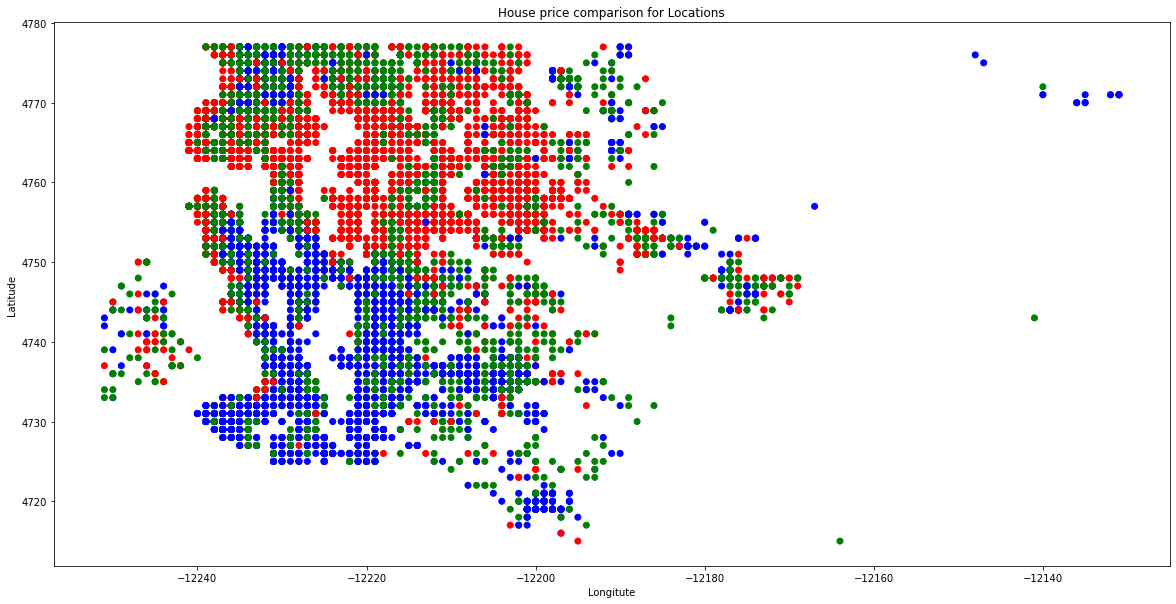

In [5]:
percentile = [30,70]
p1, p2 = np.percentile(df['price'], percentile)
price, long, lat = df['price'].tolist(), df['long'].tolist(), df['lat'].tolist()
col = []
for item in price:
    if item < p1:
        col.append('b')
    elif item >=p1 and item<p2:
        col.append('g')
    elif item >= p2:
        col.append('r')
plt.figure(figsize = (20,10))
#plt.axis([df['lat'].min(), df['lat'].max(), df['long'].min(), df['long'].max()])
plt.title('House price comparison for Locations')
plt.xlabel('Longitute')
plt.ylabel('Latitude')
plt.scatter(long, lat, c=col)
plt.show()


# Line Chart

1. Plot a set of points by joining them with continuous lines. Commonly used to visualise <b> time series data to analyse the trend</b>. 

2. Examples include stock price data, company's profit loss statement over years, number of daiy orders placed on a ecommerce website, etc.

3. Line charts are the default plots in matplotlib and can be plotted with <b>plt.plot()</b> and <b>plt.show()</b> functions.

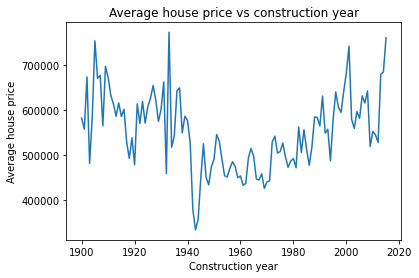

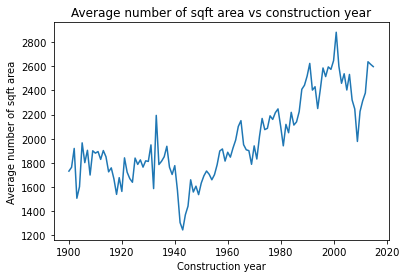

In [6]:
df_gp = df[['yr_built', 'price', 'sqft_living']].groupby(by='yr_built').mean().reset_index()

plt.plot(df_gp['yr_built'], df_gp['price'])

plt.title('Average house price vs construction year')
plt.xlabel('Construction year')
plt.ylabel('Average house price')

plt.show()



plt.plot(df_gp['yr_built'], df_gp['sqft_living'])
plt.title('Average number of sqft area vs construction year')
plt.xlabel('Construction year')
plt.ylabel('Average number of sqft area')

plt.show()


# Pie Chart

1. Plot <b>relative percentage share</b> of different groups in a criclur dimension. Whenever data is to be divided into portions to understand proportions we use pie chart.

2. Examples include  Govt. expenditure in different economic sectors, market share of web browsers, phones etc.

3. To plot use the <b>plt.pie()</b> function in matplotlib as shown below:

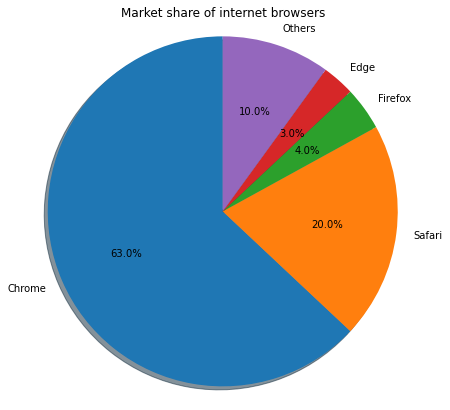

In [7]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Chrome', 'Safari', 'Firefox', 'Edge', 'Others']
sizes = [63, 20, 4, 3, 10]

plt.figure(figsize=(7,7))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)    
#startangle to start the chrome on y-axis rather than default x-axis

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Market share of internet browsers')
plt.show()


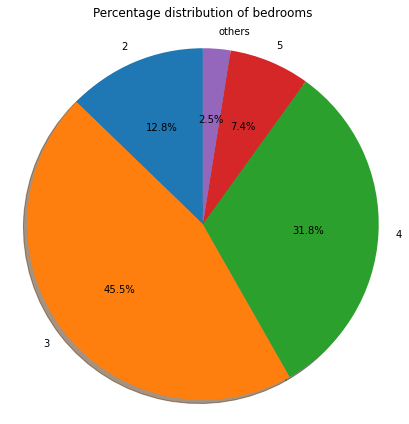

In [8]:


df1 = df.copy()
df1['bedrooms'] = df1['bedrooms'].apply(lambda x: 'others' if x>5 or x<2 else x)

df_gp = df1[['bedrooms', 'price']].groupby('bedrooms').count().reset_index()
df_gp.rename(columns = {'price': 'count'}, inplace=True)
df_gp['percentage_count'] = df_gp['count']/ df_gp['count'].sum()



plt.figure(figsize=(7,7))
plt.pie(df_gp['percentage_count'], labels=df_gp['bedrooms'],  autopct='%1.1f%%',startangle=90, shadow=True)    #startangle to start the chrome on y-axis rather than default x-axis

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage distribution of bedrooms', pad=20)

plt.show()


In [9]:
df_gp

,bedrooms,count,percentage_count
0,2,2760,0.127701
1,3,9824,0.454541
2,4,6882,0.318419
3,5,1601,0.074076
4,others,546,0.025263


In [10]:
df.shape

(21613, 21)

# Bar Chart

1. Plot <b>data already grouped into categories to compare among categories </b> on a linear scale. Pie charts are only useful for limited data, i.e. percentage distribution across small number of categories, while bar charts are more general.

2. Examples include revenue of a company in different sectors, marks obtained by students in different subjects etc.

3. To plot use the <b>plt.bar()</b> function in matplotlib as shown below:

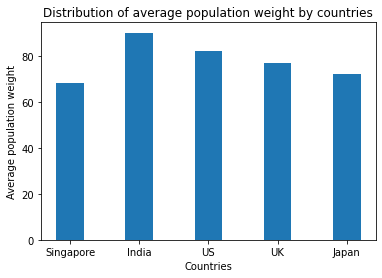

In [11]:
mean_weight = [68, 90, 82, 77, 72]
countries = ['Singapore', 'India', 'US', 'UK', 'Japan']
width = 0.4

plt.bar(countries, mean_weight, width)

plt.ylabel('Average population weight')
plt.xlabel('Countries')
plt.title('Distribution of average population weight by countries')
plt.show()


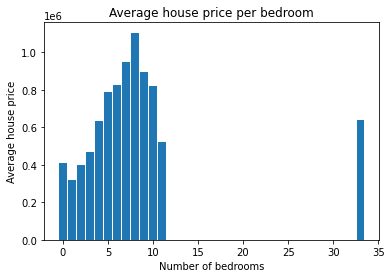

In [12]:
df_gp = df[['bedrooms', 'price']].groupby('bedrooms').mean().reset_index()

width = 0.8

plt.bar(df_gp['bedrooms'], df_gp['price'], width)

plt.ylabel('Average house price')
plt.xlabel('Number of bedrooms')
plt.title('Average house price per bedroom')
plt.show()


# Stacked Bar Chart

1. Plot <b>data already grouped into categories to compare among categories as well as inside each category </b> on a linear scale. 

2. Examples include revenue of a company in competitor companies across different sectors, marks obtained by students in different subjects of 2 schools, comparing features across and within population etc.

3. To plot use the <b>plt.bar() with special argument</b> function in matplotlib as shown below:

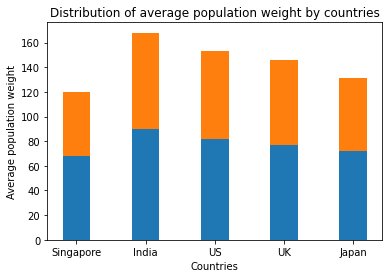

In [14]:
mean_weight_men = [68, 90, 82, 77, 72]
mean_weight_women = [52, 78, 71, 69, 59]

countries = ['Singapore', 'India', 'US', 'UK', 'Japan']
width = 0.4      

plt.bar(countries, mean_weight_men, width)
plt.bar(countries, mean_weight_women, width, bottom=mean_weight_men)

plt.ylabel('Average population weight')
plt.xlabel('Countries')
plt.title('Distribution of average population weight by countries')
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.show()


# Grouped Bar Chart

1. Rather than stacking along y-axis, concatenate different series on x-axis. Similar as stacked bar charts but easy to compare absolute numbers rather than proportaion inside each category.

2. Examples include revenue of a company in competitor companies across different sectors, marks obtained by students in different subjects of 2 schools, comparing features across and within population etc.

3. To plot use the <b>plt.bar()</b> function in matplotlib as shown below: 

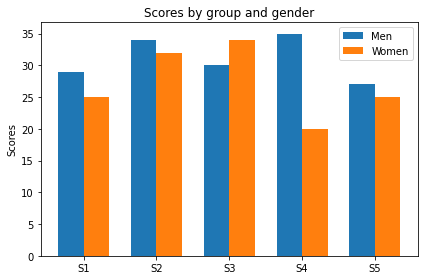

In [15]:

#Average age of men and women from 5 different states

schools =  ['S1', 'S2', 'S3', 'S4', 'S5']

men_means = [29, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(schools))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()


rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(schools)
ax.legend()

'''
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
'''

fig.tight_layout()

plt.show()


# Histogram

1. Plot frequency distribution by grouping data into intervals. 

2. Example include analysing salary distribution of individuals of a company, analysing pixels in an image, etc.

3. To plot use the <b>plt.hist()</b> function in matplotlib as shown below: 

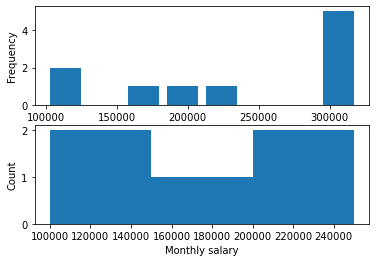

In [67]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]


data = [i*100000 for i in data]

plt.subplot(211)
plt.hist(data, bins = 8, rwidth=0.8)
plt.xlabel("Value")
plt.ylabel("Frequency")


bins = [i*100000 for i in [1, 1.5, 2, 2.5]]


plt.subplot(212)
plt.hist(data, bins)

plt.xlabel("Monthly salary")
plt.ylabel("Count")

plt.show()

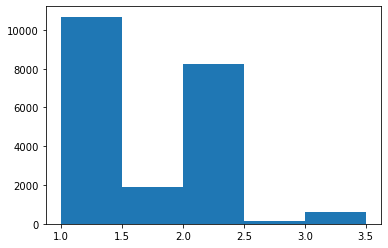

In [68]:
bedrooms = df['floors']

bins = [1,1.5, 2, 2.5, 3,3.5]

plt.hist(bedrooms, bins)
plt.show()

# Scatter Plot

1. Plot 2 variables as points in the 2-D space to analyse the relationship. One of the most important plot to <b>analyse relationship among variables for model building</b>. Predominantly used for <b>regression tasks</b>

2. Example include analysing any pairs of continuous variables. 

3. To plot use the <b>plt.scatter()</b> function in matplotlib as shown below: 

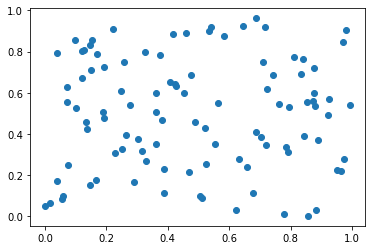

In [69]:
from numpy.random import rand

x, y = rand(2, 100)

plt.scatter(x, y)
plt.show()

[[1.         0.87441192]
 [0.87441192 1.        ]]


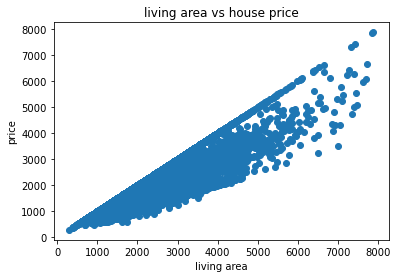

In [72]:
df1 = df.copy()

x_col = 'sqft_living'   
y_col = 'sqft_above'

#sqft_above area is total living area minus basement

df1 = df1[df1[x_col]<8000]

y = df1[y_col] 

x = df1[x_col]

print(np.corrcoef(x,y))

plt.scatter(x,y)

plt.xlabel("living area")
plt.ylabel("price")
plt.title("living area vs house price")

plt.show()

In [32]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Some variations in scatter plots

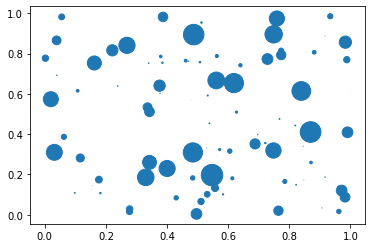

In [73]:
#Polt at different scales

x, y, scale = rand(3, 100)

scale = 500 * scale ** 5

plt.scatter(x, y, s=scale)
plt.show()

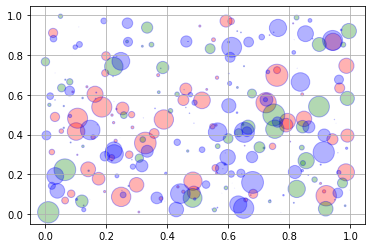

In [74]:
#And as usual there are a number of other attributes you can set, such as the fill and edge colors and the alpha level.
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = rand(2, n)
    scale = 500.0 * rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()


# Box Plot

<b>Percentile</b>
    
<b>Quartile</b>

<b>Whiskers</b>

<b>Median</b>

1. Plot single variable focusing on quartiles of the variable to <b>analyse data distribution and outliers</b>

2. Example include: Any continuous or disctrete variable like salary, house price, number of jobs etc.

3. To plot use the <b>plt.box()</b> function in matplotlib as shown below: 

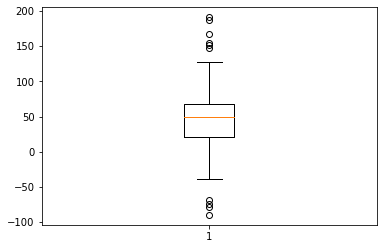

[-89.77822394  -7.73602306  17.30605501  29.87828655  50.
  50.          50.          58.83745211  84.68382543 106.23448824
 190.97658086]


In [87]:

spread = np.random.rand(50) * 100    # random 50 numbers b/w 0-100

center = np.ones(25) * 50    # random 25 numbers b/w 0-50

high = np.random.rand(10) * 100 + 100     # random 10 numbers b/w 100-200

low = np.random.rand(10) * -100     # random 10 numbers b/w -100-0

data = np.concatenate((spread, center, flier_high, flier_low))


plt.boxplot(data)
plt.show()


print(np.percentile(data, [i for i in range(0,110,10)]))

<b>Percentile</b>: Reverse Rank within data in percentage. E.g. 99% percentile means top 1%, i.e. 99% data points are below that point.

<b>Quartile</b>: There are 3 quartiles, the 1st quartile is 25th percentile, 2nd quartile is 50th percentile and 3rd quartile is 75th percentile.

<b>Whiskers</b>: The far ends of a box plot.

<b>Median</b>: The 50th percentile, it divides the data into 2 halves.

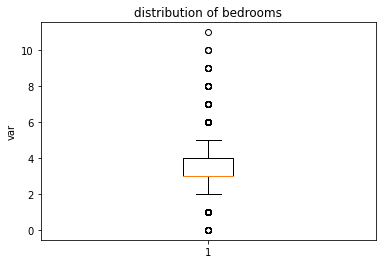

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[ 0.  2.  3.  3.  3.  3.  4.  4.  4.  4. 11.]


In [98]:
df1 = df.copy()
var = 'bedrooms'

df1 = df1[df1[var]<30]

#plt.boxplot(df1[var], showfliers=False)

plt.boxplot(df1[var])

plt.ylabel(var)
plt.title("distribution of {}".format(var))


plt.show()


print([i for i in range(0,110,10)])
print(np.percentile(df1[var], [i for i in range(0,110,10)]))

# Guidelines

1. <b>No standard rulebook</b> on chart selection. It solely depends on the data (number of variable and their type) and the information you want to convey!


2. <b>Follow the guidelines discussed here but divert as and when required, depending on the use case.</b>. Remmeber how we plotted cordinates for different house price range to visualise house localities in a city!


3. Keep in mind the 2-D space constraint and try to arrange information in best possible way.